In [1]:
import os
import json
import pandas as pd
while os.getcwd() != '/home/jupyter/crisp':
    os.chdir("..")
%pwd
from nasa_mice.functions import *
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
metrics = ['top_10_overlap_percent',
'top_20_overlap_percent',
'top_50_overlap_percent',
'ranked_bias_overlap',
'cosine_similarity']

In [27]:
def get_comparison_results(result_path, baseline, model_index):
    folder_paths = [f for f in os.listdir(result_path) if '.' not in f]

    with open(result_path+'/'+baseline+'/results_for_bucket.json') as json_file:
        base = json.load(json_file)
    
    set_results = {}
    for c in tqdm(folder_paths):
        with open(result_path+'/'+c+'/results_for_bucket.json') as json_file:
            case = json.load(json_file)
            set_results[c] = data_comparisons(base, case, model_index)
    return (set_results, folder_paths)

In [28]:
def plot_comparison_results(set_results, metrics, folder_paths, plot_title = 'untitled plot'):
    fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
    fig.suptitle(plot_title)
    idx=0
    for metric in metrics:
        vals =  [set_results[c].metrics[metric] for c in folder_paths]
        chart = sns.barplot(x=folder_paths, y = vals, ax = axs[idx])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
        chart.set_title(metric)
        idx += 1

100%|██████████| 21/21 [00:46<00:00,  2.21s/it]


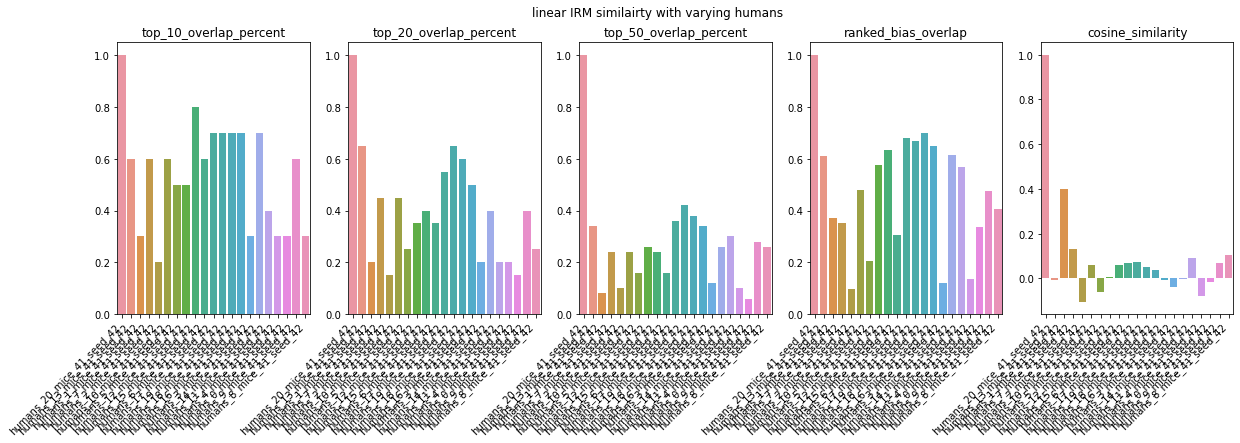

In [29]:
result_path = 'results/cosmic_rads/vary_humans'
baseline = 'humans_20_mice_41_seed_42'
model_index = 0
set_results, folder_paths = get_comparison_results(result_path, baseline, model_index)
plot_comparison_results(set_results, metrics, folder_paths, plot_title = 'linear IRM similairty with varying humans')

100%|██████████| 21/21 [00:46<00:00,  2.21s/it]


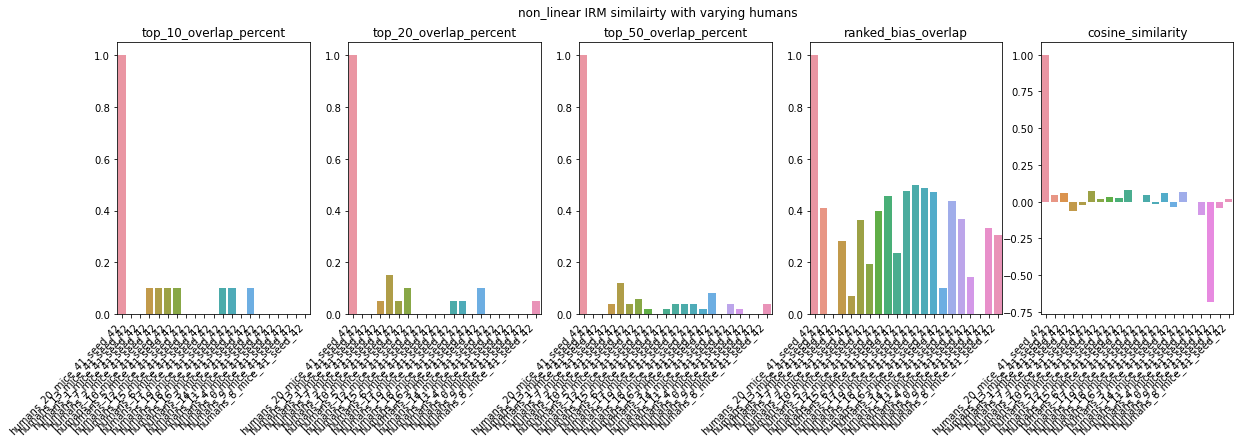

In [30]:
result_path = 'results/cosmic_rads/vary_humans'
baseline = 'humans_20_mice_41_seed_42'
model_index = 1
set_results, folder_paths = get_comparison_results(result_path, baseline, model_index)
plot_comparison_results(set_results, metrics, folder_paths, plot_title = 'non_linear IRM similairty with varying humans')

100%|██████████| 21/21 [01:18<00:00,  3.76s/it]


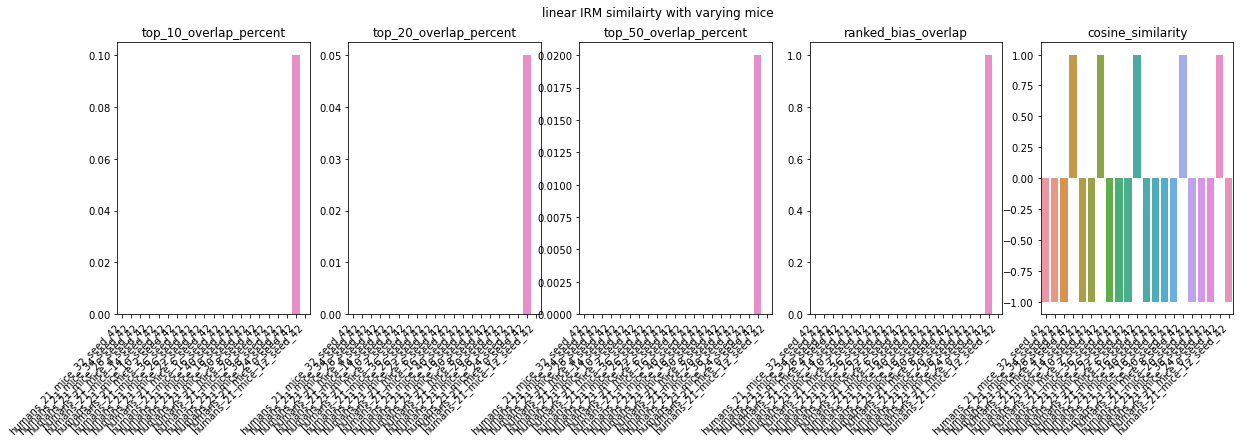

In [31]:
result_path = 'results/cosmic_rads/vary_mice'
baseline = 'humans_21_mice_0_seed_42'
model_index = 0
set_results, folder_paths = get_comparison_results(result_path, baseline, model_index)
plot_comparison_results(set_results, metrics, folder_paths, plot_title = 'linear IRM similairty with varying mice')

In [32]:
result_path = 'results/cosmic_rads/vary_mice'
baseline = 'humans_21_mice_0_seed_42'
model_index = 1
set_results, folder_paths = get_comparison_results(result_path, baseline, model_index)
plot_comparison_results(set_results, metrics, folder_paths, plot_title = 'non_linear IRM similairty with varying mice')

  0%|          | 0/21 [00:04<?, ?it/s]


TypeError: object of type 'float' has no len()